## Tarefa 1: Métodos de um Passo

### Questão 3

Neste estudo, vamos aproximar o valor da segunda coordenada, $y$, da trajetória de um robô, cuja velocidade, para tal coordenada, é:

$$
\dot{y}(t) = e^{t}\left( sin(wt) + wcos(wt) \right)
$$

Partindo do ponto $y(0) = 1$, e com $w = 2$ radianos por segundo.

Usaremos o método de Euler, um tradicional método de passo único, e sua versão modificada - o método de Euler modificado.
Os métodos de passo único calculam recursivamente as soluções de uma equação diferencial ordinária, de acordo com a forma geral $y_{k+1} = y_{k} + \Delta t \phi(t_k, y_k, n)$, onde $\Delta t = \dfrac{t_f - t_0}{n}$, com $t_k \in \{t_0, t_1, \cdots, t_f\}$, e $t_0$ e $t_f$ definindo o intervalo de aproximação.

A função $\phi$ depende do método utilizado, e equivale, no método de Euler, à função $f(t, y(t))$ - pré-definida e que modela a variação de $y$ com $t$ no problema proposto. A lógica de construção do método de Euler vem da consideração de uma expressão aproximada para a derivada de uma função $y$:

$$
\dot{y}(t) \approx \dfrac{y(t + \Delta t) - y(t)}{\Delta t}
$$

Daí, temos que $y(t + \Delta t) \approx \Delta t \dot{y}(t) + y(t) = \Delta t f(t,y(t)) + y(t)$, e essa expressão induz a definição do método:

$$
y_{k+1} = y_k + \Delta t f(t,y(t)) \\
t_{k+1} = t_k + k\Delta t
$$

Comparando a expressão da aproximação da derivada da função $y$ com a derivada exata:

$$
\dot{y}(t) = \lim_{\Delta t \to 0 } \dfrac{y(t + \Delta t) - y(t)}{\Delta t}
$$

Notamos que, conforme $\Delta t$ se aproxima de $0$, a erro do método de Euler deve tender à $0$ - como é demonstrado na teoria do método. Em particular, temos que o método de Euler é de ordem 1, que, em notação, é escrito como: $e_{euler} = \mathcal{O}(\Delta t) \Rightarrow | e_{euler} | \leq C \Delta t$, tal que $C$ é constante - no sentido de não depender de $\Delta t$ - e que o método de Euler modificado é de ordem 2.

### Implementação

In [25]:
#as bibliotecas numpy, matplotlib e math serão usadas ao longo do estudo
import numpy as np
import matplotlib.pyplot as plt
import math

Vamos definir a função $f$ do problema, tal que:

$$
\dot{y}(t) = f(t, y(t))
$$

In [3]:
#as funções cos e sin da biblioteca math recebem valores em radianos
def f(t_k, y_k):
    return math.exp(t_k)*(math.sin(2*t_k) + 2*math.cos(2*t_k))

O problema proposto induz a aproximação da função no intervalo $[0, 1]$, pois $t_0 = 0$, e queremos aproximar $y(1)$ - ou seja, $t_f = 1$. Analisaremos os resultados do método para diversos valores de $n$.

Agora, vamos definir uma função genérica para métodos de passo único, que pode ser utilizada para implementar o método de Euler, Euler modificado, e qualquer outro método desse tipo, bastando trocar a função $\phi$ na chamada. Vamos definir, também, as funções $\phi$ dos métodos de Euler e Euler modificado.

In [4]:
def ode_passo_unico(t0, tf, n, f, PHI, y0):
    y = np.zeros(n)
    y[0] = y0
    delta = (tf - t0) / n
    t = 0
    ts =[]
    ts.append(t)
    for k in range(0, n-1):
        y[k+1] = y[k] + delta * PHI(t, y[k], delta, f)
        t = t + delta
        ts.append(t)
        
    return ts,y

In [7]:
#Esta função corresponde à phi do método de euler modificado
def phi_euler_modificado(tk, yk, delta, f):
    return 0.5 * (f(tk, yk) + f(tk + delta, yk + delta*f(tk, yk)))

In [8]:
#Esta função corresponde à phi do método de euler
def phi_euler(tk, yk, delta, f):
    return f(tk, yk)

Integrando a função $\dot{y}(t)$, pelo teorema fundamental do cálculo, encontramos a função $y(t)$:

$$
\int \dot{y}(t) dt = \int e^{t}\left( sin(wt) + wcos(wt) \right) dt = e^t sin(wt) + C
$$

Pela condição inicial do problema, $y(0) = 1$, segue que $C = 1$.

In [9]:
def Y(t):
    return math.exp(t)*math.sin(2*t) + 1

In [10]:
#Invocando a função no ponto 1, conseguimos, no python, o valor mais próximo do valor teórico
Y(1)

3.4717266720048188

### Resultados

Agora, analisaremos os resultados dos dois métodos: Euler e Euler modificado.

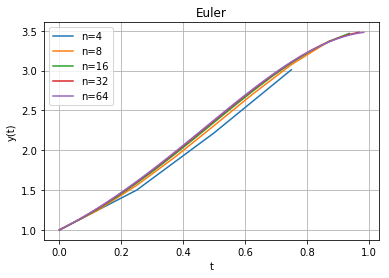

In [24]:
plt.figure()

ns = [4, 8, 16, 32, 64]

# Aproximacoes de x para diferentes n's
for n in ns:
    T, Y_ = ode_passo_unico(0.0, 1.0, n, f, phi_euler, 1.0)
    plt.plot(T, Y_, label = 'n='+str(n))

plt.title('Euler')
plt.xlabel('t')
plt.ylabel('y(t)')

plt.grid(True)
plt.legend()
plt.show()

Nota-se que, com o método de euler, a partir de $n=16$, as linhas ficam "grudadas" a olho nu. Vamos analisar o erro desse método, comparando o resultado aproximado de $y(1)$ com o resultado - mais próximo do - real encontrado a partir da chamada da função $Y$ definida acima. Para melhor visualização do comportamento assintótico do erro, vamos calculá-lo até $n=1024$.

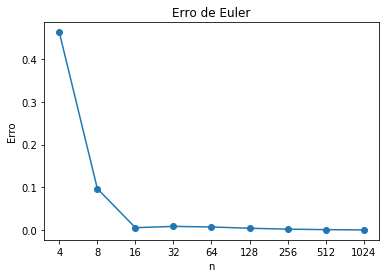

In [31]:
ns = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
erro = []
for n in ns:
    T, Y_ = ode_passo_unico(0.0, 1.0, n, f, phi_euler, 1.0)
    erro.append(Y_[-1] - Y(1))
erro_euler = [math.fabs(e) for e in erro]
ns = ['4', '8', '16', '32', '64', '128', '256', '512', '1024']

plt.figure()
plt.title('Erro de Euler')
plt.xlabel('n')
plt.ylabel('Erro')
plt.plot(ns, erro_euler, 'o-')

No gráfico acima, o $n$ é tratado como uma variável categórica. A forma do gráfico, todavia, sugere uma observação interessante: o decrescimento do erro de euler $e_{euler}$ em função do $n$ não é linear - apesar do método ser de ordem 1. Vamos verificar os erros:

In [33]:
erro_euler

[0.46216714042697093,
 0.0970089587551679,
 0.005891464381114542,
 0.00886256147598452,
 0.007527406201564446,
 0.004555669895404346,
 0.0024780624801192808,
 0.0012893671687113084,
 0.000657302418441752]

Para analisarmos essa questão mais a fundo, vamos construir um gráfico com espaçamento unitário em $n$. 

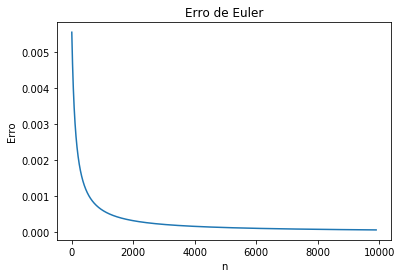

In [29]:
erro = []
for n in range(100, 10000):
    T, Y_ = ode_passo_unico(0.0, 1.0, n, f, phi_euler, 1.0)
    erro.append(Y_[-1] - Y(1))
erro_euler = [math.fabs(e) for e in erro]

plt.figure()
plt.title('Erro de Euler')
plt.xlabel('n')
plt.ylabel('Erro')
plt.plot(erro_euler)

O método de Euler é de ordem 1, ou seja, $| e_{euler} | \leq C \Delta t$, para uma  constante $C$. Como $\Delta t = \dfrac{t_{f} - t_0}{n}$, chamando $K = C(t_f  - t_0)$, segue que $| e_{euler} | \leq K \dfrac{1}{n}$, e, aproximando como visto em aula, $| e_{euler} | \approx K \dfrac{1}{n}$. Isso nos mostra que, de fato, o gráfico do erro em função de $n$ deve ter o formato do gráfico acima.

Agora, vamos analisar os resultados do método de euler modificado.

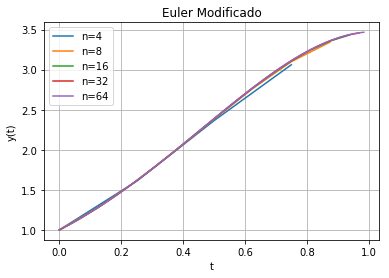

In [26]:
plt.figure()

ns = [4, 8, 16, 32, 64]

# Aproximacoes de x para diferentes n's
for n in ns:
    T, Y_ = euler_modificado(0.0, 1.0, n, f, phi, 1.0)
    plt.plot(T, Y_, label = 'n='+str(n))

plt.title('Euler Modificado')
plt.xlabel('t')
plt.ylabel('y(t)')

plt.grid(True)
plt.legend()
plt.show()

Mais uma vez, notamos que a partir de $n=16$ as funções se tornam muito próximas visualmente. Agora, vamos analisar o erro desse método:

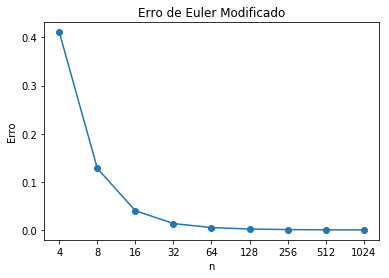

In [35]:
ns = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
erro = []
for n in ns:
    T, Y_ = ode_passo_unico(0.0, 1.0, n, f, phi_euler_modificado, 1.0)
    erro.append(Y_[-1] - Y(1))
erro_euler_modificado = [math.fabs(e) for e in erro]
ns = ['4', '8', '16', '32', '64', '128', '256', '512', '1024']

plt.figure()
plt.title('Erro de Euler Modificado')
plt.xlabel('n')
plt.ylabel('Erro')
plt.plot(ns, erro_euler_modificado, 'o-')

Vemos um formato semelhante ao erro do método de Euler. O mesmo raciocínio que foi utilizado para inferirmos um formato para gráficos de erro do método de Euler em função de $n$ pode ser utilizado para o Euler modificado, resultando em $| e_{modificado} | \approx K_{2}\dfrac{1}{n^2}$, onde $K_{2} = C(t_f - t_0)^2$. A partir daí, é possível inferir o formato desse tipo de gráfico para qualquer método de ordem $p$: $| e_{p} | \approx K_{p}\dfrac{1}{n^p}$ tal que $K_{p} = C(t_f - t_0)^p$ e $e_{p}$ é o erro de um método de ordem $p$.

Vamos verificar o os erros do método de euler modificado:

In [36]:
erro_euler_modificado

[0.4107673632490756,
 0.1279289925503302,
 0.04006108355231497,
 0.013477637964465217,
 0.005028596404772934,
 0.0020777766821167276,
 0.0009286401590298254,
 0.0004366185184161431,
 0.00021136644342600874]

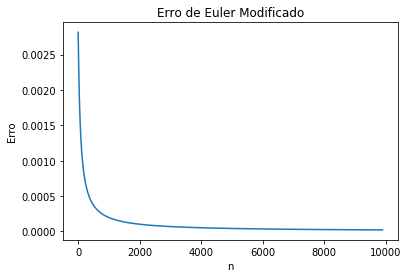

In [80]:
erro = []
for n in range(100, 10000):
    T, Y_ = ode_passo_unico(0.0, 1.0, n, f, phi_euler_modificado, 1.0)
    erro.append(Y_[-1] - Y(1))
erro_euler_modificado = [math.fabs(e) for e in erro]

plt.figure()
plt.title('Erro de Euler Modificado')
plt.xlabel('n')
plt.ylabel('Erro')
plt.plot(erro_euler_modificado)

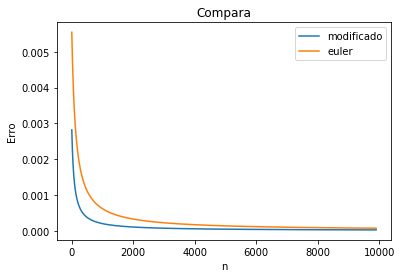

In [92]:
plt.figure()
plt.title('Compara')
plt.xlabel('n')
plt.ylabel('Erro')
plt.plot(erro_euler_modificado, label="modificado")
plt.plot(erro_euler, label="euler")
plt.legend()

In [94]:
erro_euler_modificado[-1]/erro_euler[-1]

0.3067750603730076

## EXPERIMENTOS

In [84]:
razao_modificado = []
for i in range(len(erro_euler_modificado) - 1):
    r = erro_euler_modificado[i]/erro_euler_modificado[i+1]
    base = (i + 101.0)/(i + 100.0)
    razao_modificado.append(math.log(r, base))

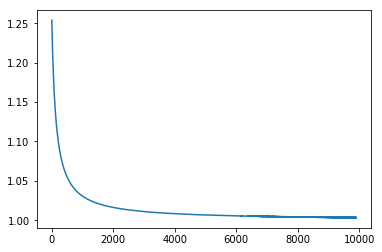

In [85]:
plt.plot(razao_modificado)

In [78]:
razao_euler = []
for i in range(len(erro_euler) - 1):
    r = erro_euler[i]/erro_euler[i+1]
    base = (1.0/(i+100.0))/(1.0/(i+101.0))
    razao_euler.append(math.log(r, base))

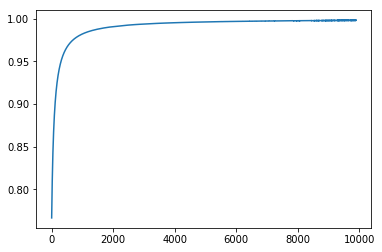

In [79]:
plt.plot(razao_euler)

Como era esperado, o erro decresce mais rapidamente

A convergência do método de euler modificado é mais rápida, como esperado.

### Conclusão

Notamos que os dois métodos convergem rápido e, por volta de $n=16$, os gráficos se tornam próximos visualmente. Além disso, verificamos que a convergência do método de euler modificado é mais rápida que a convergência do método de euler tradicional - dado que o erro do método modificado converge à zero mais rapidamente.